In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression    #Calcula la ecuación de la regresión lineal
import seaborn as sns                                #permite hacer un regplot (plot de regresión)
import matplotlib.pyplot as plt                      
import statsmodels.api as sm
import statsmodels.stats.api as sms
from patsy import dmatrices


In [ ]:
#SOLO SE USAN BACTERIAS PRESENTES EN TODAS LAS MUESTRAS

    

In [2]:
#FUNCIÓN PARA VER LA RECTA DE REGRESIÓN PARA CADA ECOSISTEMA

def plotting(x):
    #Calculo de log de medias y varianzas
    
    df = pd.read_excel(x)                          
    df.set_index("Muestras", inplace=True)         
    media = df.mean()
    var = df.var()    
    log_media=np.log(media)
    log_var=np.log(var)
    
    #Calculo de la ecuación(reuiere su paso a numpy array y luego a 2Dimensiones con reshape)
    
    x = log_media.values.reshape(-1,1)
    y = log_var.values.reshape(-1,1)   
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)   #la n
    print('slope:', model.coef_)            #la m
    print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)
    
    
    #Gráfico regplot
    
    x_mean, y_var = pd.Series(log_media, name="log_media"), pd.Series(log_var, name="log_var")
    sns.regplot(x_mean , y_var, data=df, fit_reg=True, marker = "+")



coefficient of determination: 0.9720595400111143
intercept: [-2.21461591]
slope: [[1.56903952]]
La ecuación de la recta es la siguiente: f(x)= [[1.56903952]] x + [-2.21461591]

Resultados de los datos de pulmón afectado


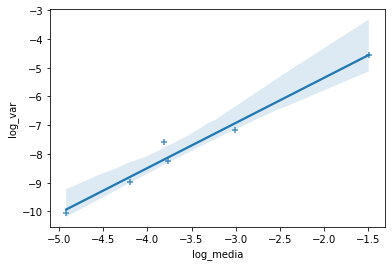

In [3]:
plotting("None0_Affected_Lung.xlsx")
print("\nResultados de los datos de pulmón afectado")

coefficient of determination: 0.9610835318006656
intercept: [-1.71412403]
slope: [[1.69754624]]
La ecuación de la recta es la siguiente: f(x)= [[1.69754624]] x + [-1.71412403]

Resultados de los datos de pulmón contralateral


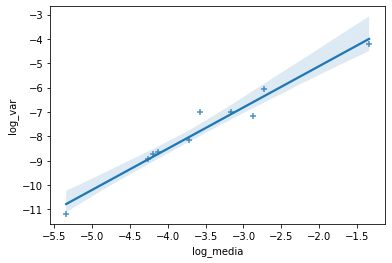

In [4]:
plotting("None0_Contraleteral.xlsx")
print("\nResultados de los datos de pulmón contralateral")

coefficient of determination: 0.9252895816903477
intercept: [-0.55454819]
slope: [[2.03317873]]
La ecuación de la recta es la siguiente: f(x)= [[2.03317873]] x + [-0.55454819]

Resultados de los datos de Pulmón sano


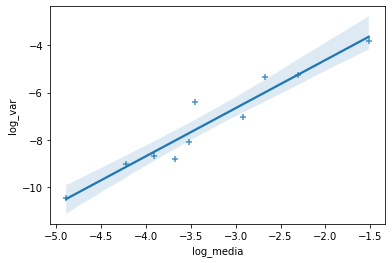

In [5]:
plotting("None0_Heal_Lung.xlsx")
print("\nResultados de los datos de Pulmón sano")

coefficient of determination: 0.9104604303789696
intercept: [-1.60062554]
slope: [[1.79342932]]
La ecuación de la recta es la siguiente: f(x)= [[1.79342932]] x + [-1.60062554]

Resultados de los datos de Saliva enfermos


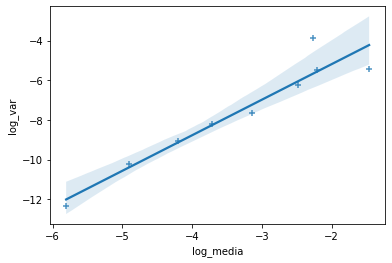

In [6]:
plotting("None0_Sick_Saliva.xlsx")
print("\nResultados de los datos de Saliva enfermos")

coefficient of determination: 0.950574385667936
intercept: [-1.82103386]
slope: [[1.76497595]]
La ecuación de la recta es la siguiente: f(x)= [[1.76497595]] x + [-1.82103386]

Resultados de los datos de Saliva sanos


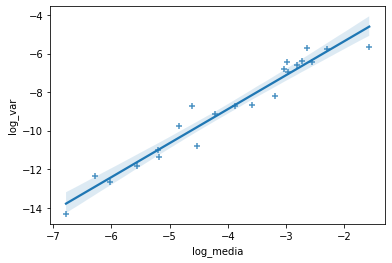

In [7]:
plotting("None0_Heal_Saliva.xlsx")
print("\nResultados de los datos de Saliva sanos")

coefficient of determination: 0.9203461221745202
intercept: [-0.41194484]
slope: [[1.81576082]]
La ecuación de la recta es la siguiente: f(x)= [[1.81576082]] x + [-0.41194484]

Resultados de los datos de Heces


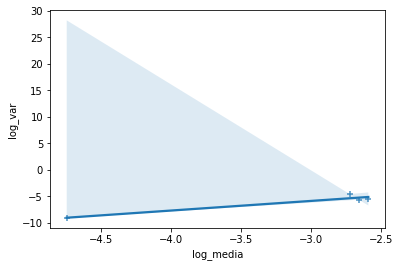

In [8]:
plotting("None0_Faeces.xlsx")
print("\nResultados de los datos de Heces")

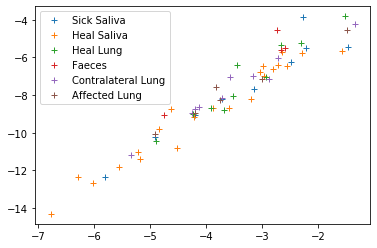

In [3]:
#-----FIN DE LA REPRESENTACIÓN DE CADA ECOSISTEMA-------------

#PLOT CON MATPLOTLIB CON TODOS LOS DATOS

#Se calculan los logaritmos de las medias y varianzas de cada ecosistema

df_AL = pd.read_excel("None0_Affected_Lung.xlsx")
df_AL.set_index("Muestras", inplace=True)
media_AL = df_AL.mean()
var_AL = df_AL.var()
log_media_AL=np.log(media_AL)
log_var_AL=np.log(var_AL)


df_CL = pd.read_excel("None0_Contraleteral.xlsx")
df_CL.set_index("Muestras", inplace=True)
media_CL = df_CL.mean()
var_CL = df_CL.var()
log_media_CL=np.log(media_CL)
log_var_CL=np.log(var_CL)

df_F = pd.read_excel("None0_Faeces.xlsx")
df_F.set_index("Muestras", inplace=True)
media_F = df_F.mean()
var_F = df_F.var()
log_media_F=np.log(media_F)
log_var_F=np.log(var_F)

df_HL = pd.read_excel("None0_Heal_Lung.xlsx")
df_HL.set_index("Muestras", inplace=True)
media_HL = df_HL.mean()
var_HL = df_HL.var()
log_media_HL=np.log(media_HL)
log_var_HL=np.log(var_HL)

df_HS = pd.read_excel("None0_Heal_Saliva.xlsx")
df_HS.set_index("Muestras", inplace=True)
media_HS = df_HS.mean()
var_HS = df_HS.var()
log_media_HS =np.log(media_HS)
log_var_HS=np.log(var_HS)

df_SS = pd.read_excel("None0_Sick_Saliva.xlsx")
df_SS.set_index("Muestras", inplace=True)
media_SS = df_SS.mean()
var_SS = df_SS.var()
log_media_SS =np.log(media_SS)
log_var_SS=np.log(var_SS)

#Se hace el plot

plt.plot(log_media_SS, log_var_SS, "+", label = "Sick Saliva")
plt.plot(log_media_HS, log_var_HS, "+", label = "Heal Saliva")
plt.plot(log_media_HL, log_var_HL, "+", label = "Heal Lung")
plt.plot(log_media_F, log_var_F, "+", label = "Faeces")
plt.plot(log_media_CL, log_var_CL, "+", label = "Contralateral Lung")
plt.plot(log_media_AL, log_var_AL, "+", label = "Affected Lung")


plt.legend() 



In [4]:
#CONVERSION DE SERIES DE PANDAS A LISTAS PARA MANEJAR MEJOR LOS DATOS

log_media_AL = log_media_AL.tolist()
log_media_CL = log_media_CL.tolist()
log_media_F = log_media_F.tolist()
log_media_HL = log_media_HL.tolist()
log_media_HS = log_media_HS.tolist()
log_media_SS = log_media_SS.tolist()

log_var_AL = log_var_AL.tolist()
log_var_CL = log_var_CL.tolist()
log_var_F = log_var_F.tolist()
log_var_HL = log_var_HL.tolist()
log_var_HS = log_var_HS.tolist()
log_var_SS = log_var_SS.tolist()

media_AL = media_AL.tolist()
media_CL = media_CL.tolist()
media_F = media_F.tolist()
media_HL = media_HL.tolist()
media_HS = media_HS.tolist()
media_SS = media_SS.tolist()

var_AL = var_AL.tolist()
var_CL = var_CL.tolist()
var_F = var_F.tolist()
var_HL = var_HL.tolist()
var_HS = var_HS.tolist()
var_SS = var_SS.tolist()

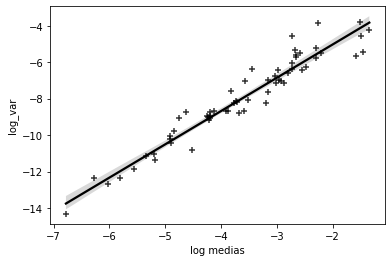

coefficient of determination: 0.927873098700116
intercept: [-1.38909895]
slope: [[1.81588616]]
La ecuación de la recta es la siguiente: f(x)= [[1.81588616]] x + [-1.38909895]
                            OLS Regression Results                            
Dep. Variable:              varianzas   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     759.0
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           2.21e-35
Time:                        02:52:57   Log-Likelihood:                -58.330
No. Observations:                  61   AIC:                             120.7
Df Residuals:                      59   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

Ttest_1sampResult(statistic=-1.8428278190120166, pvalue=0.07055646567680512)

In [5]:
#PLOT SEABORN Y ECUACIÓN DE LA RECTA

#Se hace una lista con todas las medias y varianzas

m = log_media_AL + log_media_CL + log_media_F + log_media_HL + log_media_HS + log_media_SS
v = log_var_AL + log_var_CL + log_var_F + log_var_HL + log_var_HS + log_var_SS 

#Se hace el plot de Seaborn

fake1 = pd.DataFrame({'medias': m, 'varianzas': v})
ax = sns.regplot(x = 'medias', y = 'varianzas', 
              data = fake1, 
              color = 'black', fit_reg=True,  marker = "+", robust = True)
ax.set(xlabel='log medias', ylabel='log_var')

plt.show()

#Se obtiene la ecuación de la recta (para ello hay que convertir las listas en numpy arrays y luego con reshape darle 2 dimensiones)

model = LinearRegression()

x_array = np.asarray(m)
y_array = np.asarray(v)

x=x_array.reshape(-1,1)
y=y_array.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)


#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake1, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)

coefficient of determination: 0.927873098700116
intercept: [-1.00755996]
slope: [[1.81588616]]
La ecuación de la recta es la siguiente: f(x)= [[1.81588616]] x + [-1.00755996]
                            OLS Regression Results                            
Dep. Variable:              varianzas   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     759.0
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           2.21e-35
Time:                        02:53:05   Log-Likelihood:                 97.965
No. Observations:                  61   AIC:                            -191.9
Df Residuals:                      59   BIC:                            -187.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

Ttest_1sampResult(statistic=-1.8428278190099525, pvalue=0.07055646567711123)

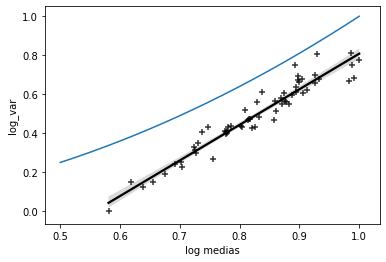

In [6]:
#PLOT SEABORN NORMALIZADO

#La normalización empleada para que los valores queden entre 0 y 1 consiste en coger el maximo y minimo 
#valor entre la varianza y la media y ejecutar lo siguiente

if min(x_array) < min(y_array):
    mini = min(x_array)
else:
    mini = min(y_array)
    
if max(x_array) > max(y_array):
    maxi = max(x_array)
else:
    maxi = max(y_array)


xnorm = (x_array - mini)/(maxi- mini)
ynorm = (y_array - mini)/(maxi- mini)



M = media_AL + media_CL + media_F + media_HL + media_HS + media_SS
V = var_AL + var_CL + var_F + var_HL + var_HS + var_SS 



#Una vez normalizados la media y la varianza se hace el plot añadiendo la recta x^2 en azul

fake2 = pd.DataFrame({'medias': xnorm, 'varianzas': ynorm})


ax = sns.regplot(x = 'medias', y = 'varianzas', 
              data = fake2, 
              color = 'black', scatter=True, fit_reg=True,  marker = "+", robust = True)
ax.set(xlabel='log medias', ylabel='log_var')

x = np.linspace(0.5, 1, 1000)
y = x**2
plt.plot(x,y,label='fit')
plt.xscale('linear')
plt.yscale('linear')

#plt.show()
plt.savefig("foo.pdf")
#Calculo de la ecuación

x=xnorm.reshape(-1,1)
y=ynorm.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake2, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)

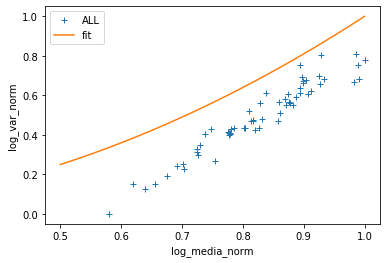

In [8]:
#PLOT MATPLOTLIB NORMALIZADO
#Con los datos normalizados anteriormente hago un plot con matplotlib

x = np.linspace(0.5, 1, 1000)
y = x**2
plt.plot(xnorm, ynorm, "+", label = "ALL")
plt.plot(x,y,label='fit')
plt.xlabel("log_media_norm")
plt.ylabel("log_var_norm")

plt.legend() 

In [9]:
#A Partir de este punto intenté ver si era necesario hacer los logaritmos, es decir ver cómo se comportaba la 
#recta sin aplicar logaritmos

#CONVERSIÓN DE SERIES A LISTAS

media_AL = media_AL.tolist()
media_CL = media_CL.tolist()
media_F = media_F.tolist()
media_HL = media_HL.tolist()
media_HS = media_HS.tolist()
media_SS = media_SS.tolist()

var_AL = var_AL.tolist()
var_CL = var_CL.tolist()
var_F = var_F.tolist()
var_HL = var_HL.tolist()
var_HS = var_HS.tolist()
var_SS = var_SS.tolist()

AttributeError: 'list' object has no attribute 'tolist'

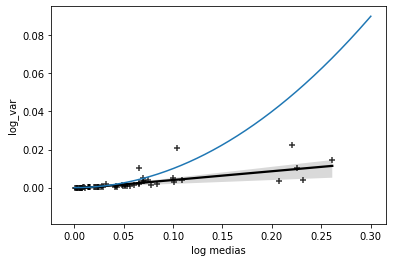

coefficient of determination: 0.5304730583691719
intercept: [-0.00055272]
slope: [[0.05418441]]
La ecuación de la recta es la siguiente: f(x)= [[0.05418441]] x + [-0.00055272]
                            OLS Regression Results                            
Dep. Variable:              varianzas   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     66.66
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.89e-11
Time:                        22:16:13   Log-Likelihood:                 266.22
No. Observations:                  61   AIC:                            -528.4
Df Residuals:                      59   BIC:                            -524.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

Ttest_1sampResult(statistic=0.08924624582245769, pvalue=0.9291990599278916)

In [10]:
#PLOT SIN HACER LOGARITMOS

m = media_AL + media_CL + media_F + media_HL + media_HS + media_SS
v = var_AL + var_CL + var_F + var_HL + var_HS + var_SS 


fake3 = pd.DataFrame({'medias': m, 'varianzas': v})
ax = sns.regplot(x = 'medias', y = 'varianzas', 
              data = fake3, 
              color = 'black', scatter=True, fit_reg=True,  marker = "+", robust = True)
ax.set(xlabel='log medias', ylabel='log_var')
x = np.linspace(0.0001, 0.3, 1000)
y = x**2
plt.plot(x,y,label='fit')
plt.show()

model = LinearRegression()

x_array = np.asarray(m)
y_array = np.asarray(v)

x=x_array.reshape(-1,1)
y=y_array.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake3, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)

In [11]:
#Tras ver que lo anterior fue un desastre intenté volver a realizar la gráfica con todos los datos pero esta vez
#aplicar una normalización por cada ecosistema en vez de usar el conjunto de datos total

#PLOT NORMALIZACIÓN POR ECOSISTEMA

#Conversión de datos y normalización

med_al = np.asarray(log_media_AL)
med_cl = np.asarray(log_media_CL)
med_f = np.asarray(log_media_F)
med_hl = np.asarray(log_media_HL)
med_hs = np.asarray(log_media_HS)
med_ss = np.asarray(log_media_SS)

var_al = np.asarray(log_var_AL)
var_cl = np.asarray(log_var_CL)
var_f = np.asarray(log_var_F)
var_hl = np.asarray(log_var_HL)
var_hs = np.asarray(log_var_HS)
var_ss = np.asarray(log_var_SS)

def opt(x_array,y_array):
    if min(x_array) < min(y_array):
        mini = min(x_array)
    else:
        mini = min(y_array)

    if max(x_array) > max(y_array):
        maxi = max(x_array)
    else:
        maxi = max(y_array)
    xnorm = (x_array - mini)/(maxi- mini)
    ynorm = (y_array - mini)/(maxi- mini)
    
    return(xnorm.tolist(), ynorm.tolist())

med_AL, var_AL = opt(med_al, var_al)
med_CL, var_CL = opt(med_cl, var_cl)
med_F, var_F = opt(med_f, var_f)
med_HL, var_HL = opt(med_hl, var_hl)
med_HS, var_HS = opt(med_hs, var_hs)
med_SS, var_SS = opt(med_ss, var_ss)

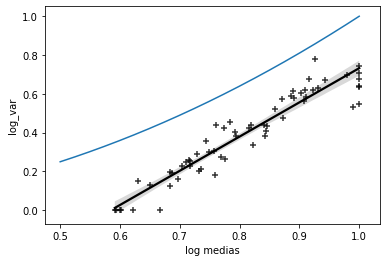

coefficient of determination: 0.9026348771164077
intercept: [-1.00997782]
slope: [[1.73425547]]
La ecuación de la recta es la siguiente: f(x)= [[1.73425547]] x + [-1.00997782]
                            OLS Regression Results                            
Dep. Variable:              varianzas   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     547.0
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.56e-31
Time:                        19:20:43   Log-Likelihood:                 77.673
No. Observations:                  61   AIC:                            -151.3
Df Residuals:                      59   BIC:                            -147.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

Ttest_1sampResult(statistic=1.818505450457772, pvalue=0.07424212641436202)

In [12]:
#Representación gráfica

m = med_AL + med_CL + med_F + med_HL + med_HS + med_SS
v = var_AL + var_CL + var_F + var_HL + var_HS + var_SS 


fake4 = pd.DataFrame({'medias': m, 'varianzas': v})
ax = sns.regplot(x = 'medias', y = 'varianzas', 
              data = fake4, 
              color = 'black', scatter=True, fit_reg=True,  marker = "+", robust = True)
ax.set(xlabel='log medias', ylabel='log_var')
x = np.linspace(0.5, 1, 1000)
y = x**2
plt.plot(x,y,label='fit')
plt.show()

#Calculo de la ecuación

model = LinearRegression()
x_array = np.asarray(m)
y_array = np.asarray(v)

x=x_array.reshape(-1,1)
y=y_array.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake4, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)

In [13]:
#Al final como era de esperarse el resultado es peor, ya que al hacer normalizaciones por cada ecosistema se puede 
#ver que hay 6 valores 1 en el eje x que no coinciden



[-5.50354089 -5.42549311 -6.06122376 -2.15272524 -4.3416497  -7.09649867
 -4.55678807 -5.14646166 -3.92858045 -5.37051619 -6.05268798 -1.93772652
 -4.14016528 -6.13709962 -7.70229965 -5.95468479 -6.84846518 -3.74138328
 -3.93402085 -3.84042467 -7.0550608  -3.85151055 -3.32521249 -4.97570059
 -6.09805116 -5.0768142  -5.29744637 -5.64049259 -4.21665485 -2.18582755
 -5.60058623 -9.06419799 -4.37175836 -6.99182477 -4.04842681 -4.29546899
 -4.27265291 -6.66427631 -3.30924903 -7.51273967 -8.69246515 -7.48258383
 -5.18147426 -6.52363342 -2.26992971 -8.01180445 -9.77825438 -3.68828819
 -4.61175509 -6.08875012 -3.82029946 -3.92985373 -5.35619288 -3.26557574
 -3.1961872  -4.54402268 -2.11273675 -8.37711546 -7.07971532 -3.57418362
 -6.06047899]
[-10.93193764 -11.88472686 -12.94458178  -6.57629685 -10.32307066
 -14.49248235 -10.06966838 -10.11709149  -8.71116023 -11.76679224
 -12.58454535  -6.09194436 -10.32970765 -12.9071506  -16.11718639
 -12.48529063 -13.08418423  -7.95728236  -6.5822657   -8.0

Ttest_1sampResult(statistic=-1.8428278190099525, pvalue=0.07055646567711123)

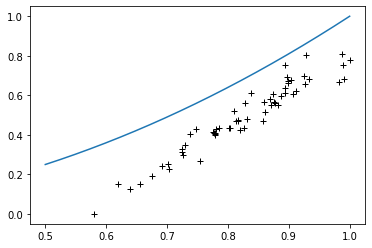

In [123]:
#PLOT SEABORN Log2


M = media_AL + media_CL + media_F + media_HL + media_HS + media_SS
V = var_AL + var_CL + var_F + var_HL + var_HS + var_SS 



#Una vez normalizados la media y la varianza se hace el plot añadiendo la recta x^2 en azul


x = np.linspace(0.5, 1, 1000)
y = x**2


M = np.log2(M)
V = np.log2(V)

if min(M) < min(V):
    mini = min(M)
else:
    mini = min(V)
    
if max(M) > max(V):
    maxi = max(M)
else:
    maxi = max(V)


mnorm = (M - mini)/(maxi- mini)
vnorm = (V - mini)/(maxi- mini)


#for i in (0,range(len(V)):
   

#plt.xscale('log')
#plt.yscale('log')
plt.plot(x,y,label='fit')
plt.plot(mnorm, vnorm, "+", color = "black")




#plt.show()
plt.savefig("fou.pdf")


x=mnorm.reshape(-1,1)
y=vnorm.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake2, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)





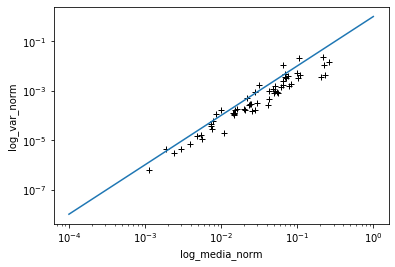

In [10]:
#Escalado por logscale

M = media_AL + media_CL + media_F + media_HL + media_HS + media_SS
V = var_AL + var_CL + var_F + var_HL + var_HS + var_SS 


x = np.linspace(0.0001, 1, 1000)
y = x**2
plt.plot(M, V, "+", color = "black")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,label='fit')
plt.xlabel("log_media_norm")
plt.ylabel("log_var_norm")
plt.savefig("frt.pdf")



SyntaxError: invalid syntax (<ipython-input-70-b21942ba30bb>, line 9)

coefficient of determination: 0.927873098700116
intercept: [-0.91300241]
slope: [[1.81588616]]
La ecuación de la recta es la siguiente: f(x)= [[1.81588616]] x + [-0.91300241]
                            OLS Regression Results                            
Dep. Variable:              varianzas   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     759.0
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.21e-35
Time:                        22:32:23   Log-Likelihood:                 103.98
No. Observations:                  61   AIC:                            -204.0
Df Residuals:                      59   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

Ttest_1sampResult(statistic=-1.842827819015722, pvalue=0.07055646567625554)

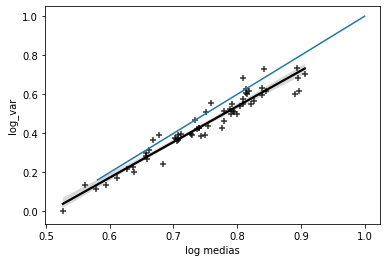

In [28]:
#Escalando todo incluido y = x^2


Xm = np.linspace(0.000001, 0.999, 2000)
Yv = Xm**2

Xm = np.log10(Xm)
Yv = np.log10(Yv)


if min(x_array) < min(y_array):
    mini = min(x_array)
else:
    mini = min(y_array)
    
if max(x_array) > max(y_array):
    maxi = max(x_array)
else:
    maxi = max(y_array)

maxi = max(Xm)  #Se sabe que es el menor
xnorm = (x_array - mini)/(maxi- mini)
ynorm = (y_array - mini)/(maxi- mini)
Xm = (Xm - mini)/(maxi- mini)
Yv = (Yv - mini)/(maxi- mini)


plt.plot(Xm,Yv,label='fit')
plt.xlabel("log_media_norm")
plt.ylabel("log_var_norm")

#Una vez normalizados la media y la varianza se hace el plot añadiendo la recta x^2 en azul

fake6 = pd.DataFrame({'medias': xnorm, 'varianzas': ynorm})


ax = sns.regplot(x = 'medias', y = 'varianzas', 
              data = fake6, 
              color = 'black', scatter=True, fit_reg=True,  marker = "+", robust = True)
ax.set(xlabel='log medias', ylabel='log_var')

#plt.show()
plt.savefig("fre.pdf")


#Calculo de la ecuación

x=xnorm.reshape(-1,1)
y=ynorm.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake6, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)

print("--------------------------")
  
    
#Calculo de la ecuación

x=Xm.reshape(-1,1)
y=Yv.reshape(-1,1)

model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)   #la n
print('slope:', model.coef_)            #la m
print("La ecuación de la recta es la siguiente: f(x)=", model.coef_, "x +",model.intercept_)

#Estadísticos 

y, X = dmatrices('varianzas ~ medias', data=fake6, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit() 
print(res.summary()) 

sms.linear_harvey_collier(res)  #El primero es el t-value y el segundo el p-value (la hipótesis nula es que es linear)